# SOLD!


#### Authors:
v1.0 (2016 Spring) Kabir Chandrasekher, Tony Duan, David Marn, Ashvin Nair, Kangwook Lee, and Kannan Ramchandran

v1.1 (2017 Spring) Tavor Baharav, Kabir Chandrasekhar, Sinho Chewi, Andrew Liu, Kamil Nar, David Wang, and Kannan Ramchandran

v1.2 (2017 Fall) Sinho Chewi, Avishek Ghosh, Chen Meng, Abhay Parekh, and Jean Walrand


<table>
<tr>
<td>
<img src="http://i.imgur.com/M0E5ZbL.jpg" alt="Google Ads" style="width: 450px;">
</td>
<td>
<img src="http://i.imgur.com/uC3mhpk.jpg" alt="FCC Spectrum" style="width: 450px;">
</td>
</tr>
</table>
Be it frequency bandwidth or ads that we "see" everyday (thanks Adblock Plus!), we're constantly asking ourselves how to distribute goods in a "fair" manner. Optimal allocation of rival goods is a hot question in both theoretical EE research (see research articles by Sahai [[1]](#References) and Harrison [[2]](#References)) and in society as a philosophical conundrum (see books by Nozick [[3]](#References) or Rawles [[4]](#References)).

## Introduction

If we want to use math and probability to gain some insight into this dilemma, we must first set up a theoretical model of an <b>auction</b> - which is basically a mechanism. 

An auction has a <b>seller</b>, who is trying to sell <b>one</b> item. Multiple <b>buyers</b> (synonymous with "bidder") - there are $n$ of them - are interested in purchasing this item, but the item can only be sold to one buyer. Each buyer associates a value to an item (how much is this item worth <i>to them</i>). These values usually differ and may or may not be independent of one another. Call buyer $i$'s value of an item $x_i$. Each buyer then bids $\beta_i (x_i)$, a function of $x_i$. This is person $i$'s bidding function. The seller then sells the item to one of the buyers according to some mechanism $M$. 

<img src="http://worldartsme.com/images/auction-gavel-clipart-1.jpg" alt="auction diagram" style="width:100px;">

We will attempt to answer some basic questions about auctions. We are interested in:
<ul>
<li> Seller revenue, i.e. how much does the seller make?</li>
<li> Buyer profit - what, if any, is the difference between the winning bid and the buyer's value of an item? </li> 
<li> Difference between mechanisms - what difference does the type of auction have on the buyer? What about the seller? How do reserves affect them? </li>
</ul>



## Assumptions
We assume that this is a fair and reasonable auction. See [auction details](#Definitions) for a more precise definition, but in general, these assumptions simply mean that the auction operates as you would expect.

# Q1) First Price Auction (FPA)
In this auction, each buyer makes one bid ("offer") to the seller. The seller sells the item to the highest bidder for that amount. 

Example of an ad auction:
<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Abra</td>
<td>\$5</td>
<td>Yes</td>
<td>\$5</td>
</tr>
<tr>
<td>Bulbasaur</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charmander</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$5.

Suppose that we know that all buyers draw their values uniformly at random from the $(0,1)$ interval. Given that you are person $i$, valuing the item at $x_i$, how much should you bid? Suppose that everyone else is extremely risk averse, meaning that their function is $\beta_j(x_j) = x_j, \forall j \neq i$. 

Try to maximize your profit (or expected utility, as referred in the homework), using the bidding function you derived in your homework!

### Auction Simulator
We will begin by building a simulator for our auctions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import lambertw

%matplotlib inline

def simulate_fpa(num_players, beta_fn, distribution, num_trials=1000):
    """
    num_players (int): The number of bidders in the auction.
    beta_fn (function): The bidding function (takes in as input the valuation
        of a bidder and returns how much the bidder bids).
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray)
        Entry `i` of this array will contain the total gain of utility of the
        bidder after `i - 1` trials have elapsed (recall that in Python, arrays
        are zero-indexed).
        This will be plotted in Q1(a) and Q1(b).
    """
    cumulative_profit = 0.0
    profit_timeseries = np.zeros(num_trials)
    num_wins = 0
    for i in range(num_trials):
        valuations = np.zeros(num_players)

        if distribution == "uniform":
            valuations = np.random.uniform(size=num_players)
        elif distribution == "exponential":
            valuations = np.random.exponential(0.5, size=num_players)
        else:
            print("Unknown distribution!")
            return

        bids = np.copy(valuations)
        # change your bid based on your beta function
        bids[0] = beta_fn(valuations[0])
        winner = np.argmax(bids)
        if winner == 0:
            num_wins += 1
            cumulative_profit += valuations[0] - bids[0]
        profit_timeseries[i] = cumulative_profit
    print("Number of Wins:", num_wins)
    return profit_timeseries

### Q1 (a) FPA Uniform
Now, run a simulation for 1000 rounds with two buyers, and your optimized bidding function. Plot your cumulative profit as it evolves over time. How much can you earn on average? How do your bidding function, cumulative profit, and expected profit change if we have $n-1$ other bidders (plot with $n = 10$  (9 other bidders))? Explain the differences between these graphs.

Note: You should first mathematically derive the expected total profit over all of the trials, and then empirically verify that your answer is correct. Here, the expectation is taken over the valuations of all bidders.

Number of Wins: 257
Average Profit: 0.08351700795354366
Total Profit: 83.51700795354367


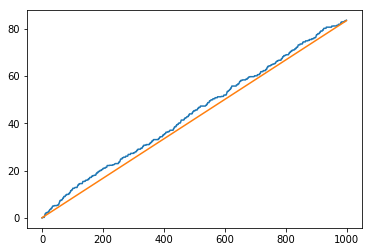

In [7]:
def beta(valuation):
    return valuation / 2

results = simulate_fpa(2, beta, "uniform", 1000)
expected_profits = [1.0 / 12 * x for x in range(1, 1001)]
print("Average Profit:", results[999] / 1000)
print("Total Profit:", results[999])
plt.figure()
plt.plot(results)
plt.plot(expected_profits)

# expected profit = 1000 / 12 ~ 83.33 over 1000 rounds

Number of Wins: 42
Average Profit: 0.00384025412446
Total Profit: 3.84025412446


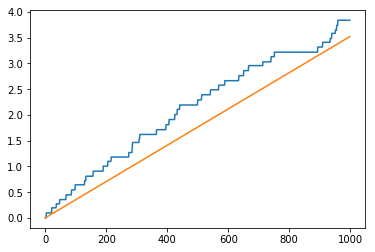

In [5]:
n = 10

def beta2(valuation):
    return (n - 1) * valuation / n

results = simulate_fpa(n, beta2, "uniform", 1000)
expected_profits = [1.0 * ((n - 1) ** (n - 1)) / ((n ** n) * (n + 1)) * x \
    for x in range(1, 1001)]
print("Average Profit:", results[999] / 1000)
print("Total Profit:", results[999])
plt.figure()
plt.plot(results)
plt.plot(expected_profits)

# expected profit ~ 3.52

We model our winnings for each round as a random variable $W$ for bidding function $\beta$ in an auction with $n+1$ people (bidding against $n$ others):

$$
W =
 \begin{cases} 
      0, &  \text{w.p. } 1 - \beta(a)^n \\
      a-\beta(a), & \text{w.p. } \beta(a)^n
\end{cases}
$$

Bidding against $n$ other people, we see that our expected winnings ($W$) for valuation $a \in (0,1)$ will be
$$\mathbb{E}[W] = \mathbb{E}\bigl[\bigl(a-\beta(a)\bigr) \beta(a)^n\bigr] =\mathbb{E}\Bigl[\Bigl(a - \frac{na}{n+1}\Bigr) \Bigl(\frac{na}{n+1}\Bigr)^n\Bigr] = \frac{n^n}{(n+1)^{n+1}} \mathbb{E}[a^{n+1}] = \frac{n^n}{(n+1)^{n+1}(n+2)}.$$

Thus, in an auction with n people total (n-1 other bidders), our expected profit is:
$$ \frac{(n-1)^{(n-1)}}{n^n(n+1)}$$

We can see that with $n = 2$, the graph is much smoother, whereas with $n = 10$, you can clearly see the individual steps/wins. This is because in the $n = 10$ case, we win much less of the time, meaning that in a much larger percentage of the trials, no profit is made, as we lose the auction.

### Q1 (b) FPA Exponential
Now assume that everyone (including you) draws their values from the exponential distribution with parameter $\lambda = 2$. Assuming everyone else is still bidding their valuation, how good of a bidding function can you empirically create for bidding against 9 other people ($n = 10$), who all bid their valuations? Note that it is not necessary to find a closed-form solution. Just play around with different bidding functions and try to find the best one you can! Additionally, feel free to reuse code from previous parts.

Number of Wins: 53
Average Profit: 0.0291972936279
Total Profit: 29.1972936279


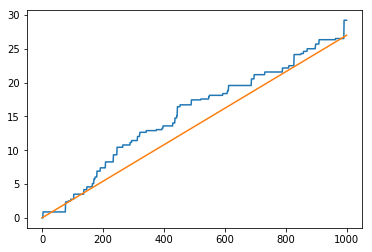

In [6]:
Lambda = 2
n = 10

# exact closed form solution, don't worry about derivation
def beta3(your_valuation): 
    return your_valuation + 1.0 / Lambda / (n - 1) - 1.0 / Lambda \
        * np.real(lambertw(np.exp(your_valuation * Lambda + 1.0 / (n - 1)) \
        / (n - 1)))

results = simulate_fpa(n, beta3, "exponential", 1000)
expected_profits = [.02697 * x for x in range(1, 1001)]
print("Average Profit:", results[999] / 1000)
print("Total Profit:", results[999])
plt.figure()
plt.plot(results)
plt.plot(expected_profits)
# expected profit empirically ~ 26.97

Our winning $W$ for bidding function $\beta$, with $n+1$ people (bidding against $n$ others) is:

$$
W =
 \begin{cases} 
      0, &  \text{w.p. } 1- (1-\mathrm{e}^{-\lambda x})^n \\
      a-\beta(a), & \text{w.p. } (1-\mathrm{e}^{-\lambda x})^n
\end{cases}
$$

Bidding against $n$ other people, we see that our expected winnings ($W$) for valuation $a \sim \exp(\lambda)$, with bid $x = \beta(a)$ will be
$$\mathbb{E}[W] = \mathbb{E}[(a-x) (1-\mathrm{e}^{-\lambda x})^n].$$
Taking the derivative of this with respect to $x$ and setting to $0$ to find the maximum (we can do this freely, as we are simply computing $x$ for a fixed value of $a$, so $a$ is a constant here with respect to $x$), we get:
$$-(1-\mathrm{e}^{-\lambda x})^n + (a-x)n(1-\mathrm{e}^{-\lambda x})^{n-1}\lambda \mathrm{e}^{-\lambda x} = 0$$
$$1 + (a-x)n \lambda = \mathrm{e}^{\lambda x}$$
We plug this in to wolfram alpha to solve, yielding
$$x = a + \frac{1}{n\lambda} - \frac{1}{\lambda} \mathcal{W}\Bigl(\frac{\mathrm{e}^{\lambda a+ 1/n}}{n}\Bigr),$$

meaning that in an auction with $n$ people, our optimal bidding function is:
$$\beta(a) = a + \frac{1}{(n-1)\lambda} - \frac{1}{\lambda} \mathcal{W}\Bigl(\frac{e^{\lambda a+ 1/(n-1)}}{n-1}\Bigr)$$
where $\mathcal{W}$ is the <a href = "http://reference.wolfram.com/language/ref/ProductLog.html">product log function</a>. This level of math was not expected for this class. In that same vein, the expected value of this function was determined empirically.

# Q2) Second Price Auction (SPA)
In this auction, each buyer again makes one secret bid. The bidder with the highest bid wins, but they only pay the second highest value. Google uses a modified version of this auction in practice (see<a> https://support.google.com/adsense/answer/160525?hl=en</a>).

Here is an example of a second price ad auction. Only one person gets to show the ad:  

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Abra</td>
<td>\$5</td>
<td>Yes</td>
<td>\$3</td>
</tr>
<tr>
<td>Bulbasaur</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charmander</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$3.

Operating under the same assumptions as in the first price option case, we assume all buyers draw their values uniformly at random from the $(0,1)$ interval. Given that you are person $i$, valuing the item at $x_i$, how much should you bid? Suppose that everyone else is extremely risk averse, meaning that their function is $\beta_j(x_j) = x_j, \forall j \neq i$. In fact this is the optimal bidding function for the second price auction.

Modify your simulator to work for the second-price auction case, or feel free to copy and alter you first price simulator.

## Q2 (a) SPA Profit
Plot your cumulative profit for two buyers as it evolves over time. How much can you earn on average? How do your bidding function, cumulative profit, and expected profit change if we have $n$ bidders total ($n-1$ other bidders)? Evaluate the latter for $n = 10$ (9 other bidders).

In [7]:
def simulate_spa(num_players, beta_fn, distribution, num_trials=1000):
    cumulative_profit = 0.0
    profit_timeseries = np.zeros(num_trials)
    num_wins = 0
    for i in range(num_trials):
        valuations = np.zeros(num_players)
    
        if distribution == "uniform":
            valuations = np.random.uniform(size=num_players)
        elif distribution == "exponential":
            valuations = np.random.exponential(0.5, size=num_players)
        else:
            print("Unknown distribution")
            return

        bids = np.copy(valuations)
        # change your bid based on your beta function
        bids[0] = beta_fn(valuations[0])
        winner = np.argmax(bids)
        # delete the highest bid
        bids = np.delete(bids, winner)
        if winner == 0:
            num_wins += 1
            cumulative_profit += valuations[0] - np.max(bids)
        profit_timeseries[i] = cumulative_profit
    print("Number of Wins:", num_wins)
    return profit_timeseries

Number of Wins: 482
Average Profit: 0.159948717149
Total Profit: 159.948717149


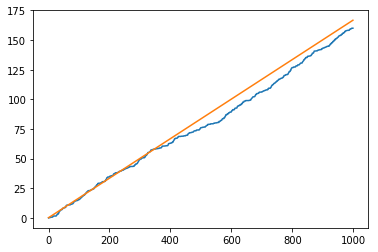

In [8]:
n = 2
def beta4(valuation):
    return valuation

results = simulate_spa(n, beta4, "uniform", 1000)
print("Average Profit:", results[999] / 1000)
print("Total Profit:", results[999])
expected_profit = [1.0 / (n) / (n + 1) * x for x in range(1, 1001)]
plt.figure()
plt.plot(results)
plt.plot(expected_profit)
# expected profit of 1000 / 6 ~ 166.66

Number of Wins: 95
Average Profit: 0.00968131501187
Total Profit: 9.68131501187


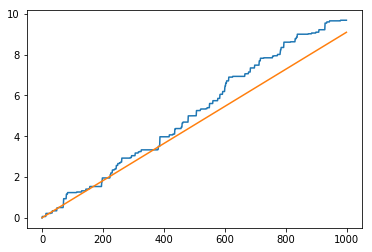

In [9]:
n = 10
def beta4(valuation):
    return valuation

results = simulate_spa(n, beta4, "uniform", 1000)
print("Average Profit:", results[999] / 1000)
print("Total Profit:", results[999])
expected_profit = [1.0 / (n) / (n + 1) * x for x in range(1, 1001)]
plt.figure()
plt.plot(results)
plt.plot(expected_profit)
# expected profit = 1000 / 110 ~ 9.09

Bidding against $n$ other people, we see that our expected winnings ($W$) for valuation $a \in (0,1)$ will be 
$$\mathbb{E}[W] = \mathbb{E}\bigl[\bigl(a-\beta(a)\bigr) a^n\bigr] = \mathbb{E}\Bigl[\Bigl(a - \frac{na}{n+1}\Bigr) a^n\Bigr] = \frac{1}{(n+1)} \mathbb{E}[a^{n+1}] = \frac{1}{(n+1)(n+2)}.$$
Thus, for an auction with $n$ people, our expected winnings are
$$\frac{1}{n(n+1)}.$$

### Q2 (b) Seller Revenue
Now, let's try and see how things look from the other side. Given that all $n$ buyers draw their values uniformly at random from the $(0,1)$ interval, should the seller choose to hold a first price auction, or a second price auction, given that people use optimal bidding functions described above? Show your answer by plotting the revenue from both auctions.

(You can plot $n = 6$ bidders with $100$ trials.)

Seller Earned: 70.8039813531
Seller Earned: 72.7502822224


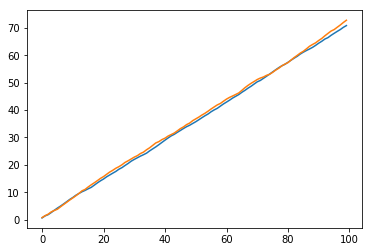

In [10]:
def simulate_seller(
        num_players, distribution, is_first_price, num_trials=1000):
    seller_earnings = 0.0
    revenue_timeseries = np.zeros(num_trials)

    for i in range(num_trials):
        valuations = np.zeros(num_players)
    
        if distribution == "uniform":
            valuations = np.random.uniform(size=num_players)
        elif distribution == "exponential":
            valuations = np.random.exponential(0.5, size=num_players)
        else:
            print("Unknown distribution!")
            return

        bids = np.copy(valuations)
        # change your bid based on your beta function
        if is_first_price:
            bids = (num_players - 1) * bids / num_players
        else:
            winner = np.argmax(bids)
            bids = np.delete(bids, winner)
        seller_earnings += np.max(bids)
        if i == 0:
            revenue_timeseries[i] = np.max(bids)
        else:
            revenue_timeseries[i] = revenue_timeseries[i - 1] + np.max(bids)
    print("Seller Earned:", seller_earnings)
    return revenue_timeseries

n = 6
num_trials = 100

fpa = simulate_seller(n, "uniform", True, num_trials)
spa = simulate_seller(n, "uniform", False, num_trials)

plt.figure()
plt.plot(fpa)
plt.plot(spa)

The seller revenue is the same in the two cases! We look at the two cases:

FPA: Everyone is bidding $\displaystyle \frac{n-1}{n}$ times their valuation, so we know that everyone's bid is distributed uniformly on the interval $\displaystyle \Bigl(0, \frac{n-1}{n}\Bigr)$. By symmetry, we can see that the max of $n$ of these bids will be
$$\frac{n}{n+1} \cdot \frac{n-1}{n} = \frac{n-1}{n+1},$$
and in a FPA, we earn the max bid.

SPA: Everyone is bidding their valuation, and we earn the second highest bid in revenue. In expectation, the $i$th lowest bid out of the $n$ will be $\displaystyle\frac{i}{n+1}$. We are not looking for the highest bid, which will be $\displaystyle\frac{n}{n+1}$ on average, as this is a second price auction, so we look at the second highest of the bids, which will be in expectation $\displaystyle\frac{n-1}{n+1}$.

As we can see, no matter the style of auction, we end up with an expected seller revenue of $\displaystyle\frac{n-1}{n+1}$ per auction.

# Q3) First Price Auction with a Reserve

In this scenario, you are again operating as the $\textbf{seller}$. You want to maximize your revenue selling $k$ identical items over $a$ auctions, $a\geq k$, and thus set a reserve price for each auction. This means that unless the maximum bid in a given auction is above the reserve price you set, the transaction is not completed, and no money or goods exchange hands. If the highest bid is above the reserve price, then the transaction occurs as per usual, with the winner paying what he bid in exchange for the item.

Here is an example of a first price auction with a reserve of $4:  

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Abra</td>
<td>\$5</td>
<td>Yes</td>
<td>\$5</td>
</tr>
<tr>
<td>Bulbasaur</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charmander</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$5.


Whereas, here is an example of that same auction with a reserve of $6:

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Abra</td>
<td>\$5</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Bulbasaur</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charmander</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$0.


Using a similar framework to before, we are now going to try to optimize the reserve to maximize the seller's profit.

### Q3 (a) Varying Reserve
Suppose that you have $1$ iPhone that you can try to sell at $100$ different auctions, with one auction occuring each day, where at each auction $n$ bidders bid independently according to a fixed bidding function and a fixed but unknown distribution. If you can change the reserve for each auction, what should your reserve strategy as the seller be?

Below, please write an explanation of your strategy in markdown (no code needed).

This is a real world example of the secretary problem! Our optimal solution is to set the reserve to infinity for the first $\displaystyle \frac{100}{\mathrm{e}}$ auctions, keeping track of the maximum winning bid, and setting the reserve for the remaining auctions to be that maximum bid from the first $\displaystyle \frac{100}{\mathrm{e}}$ auctions. If we have yet to sell the iphone by the last auction, we set the reserve to $0$.

### Q3 (b) Fixed Reserve
Now suppose that you have $10$ iPhones that you can take to $100$ different auctions, with one first price auction occuring each day, where at each auction $n = 5$ bidders draw their values uniformly at random from the exponential distribution with parameter $2$, with $\beta_j(x_j) = x_j, \forall j$. Empirically try and optimize one fixed reserve value to use over all the auctions to maximize your expected total revenue.

In [12]:
def simulate_fpa_seller_reserve(
        num_players, distribution, reserve, num_items, num_auctions=1000):
    seller_earnings = 0.0
    for i in range(num_auctions):
        if num_items == 0:
            break
        valuations = np.zeros(num_players)
        if distribution == "uniform":
            valuations = np.random.uniform(size=num_players)
        elif distribution == "exponential":
            valuations = np.random.exponential(0.5, size=num_players)
        else:
            print("Unknown distribution!")
            return
        bids = np.copy(valuations)
        if np.max(bids) > reserve and num_items > 0:
            seller_earnings += np.max(bids)
            num_items -= 1
    return seller_earnings


def compute_expected_empirical(a, k, r):
    summ = 0
    num_trials = 100
    for i in range(num_trials):
        summ += simulate_fpa_seller_reserve(1, "exponential", r, k, a)
    return summ / num_trials


def compute_expected_dp(a, k, r):
    dp_array = np.zeros((k, a))
    p_lose = (1 - np.exp(-Lambda * r))
    p_win = np.exp(-Lambda * r)
    for i in range(1, k):
        for j in range(1, a):
            dp_array[i][j] = p_lose * dp_array[i][j - 1] \
                + p_win * (dp_array[i - 1][j - 1] + r + 1.0 / Lambda)
    return dp_array[items - 1, auctions - 1]


Lambda = 2
auctions = 1000
items = 10


def calculate_reserve_binary_exp(a, k, n, num_iter):
    low_r = 0
    high_r = 100
    eps = 1e-10

    for _ in range(num_iter):
        if num_iter == 8:
            eps = 1e-15
        curr_r = (low_r + high_r) / 2.0
        curr_revenue = compute_expected_dp(a, k, curr_r)
        curr_r_eps = curr_r + eps
        curr_revenue_eps = compute_expected_dp(a, k, curr_r_eps)
        if curr_revenue_eps >= curr_revenue:
            low_r = curr_r
        else:
            high_r = curr_r
    return (low_r + high_r) / 2.0

calculate_reserve_binary_exp(auctions, items, n, 25)

2.1954193711280823

# Competition (Optional)

Now that we've got your attention, we'd like to announce our first lab competition! The top 3 teams (form teams of 3-4 people) will be given extra credit.

The details of the competition are as follows: you are a seller trying to maximize your expected revenue selling $k$ identical items over $a$ different auctions, where $n$ bidders draw their values uniformly at random from the interval $(0,1)$, with $\beta_j(x_j) = x_j, \forall j$. Your job as the seller is to set a single fixed reserve price $r$ to be used over all $a$ auctions, to maximize your revenue. You will submit your solution in a separate python file, _results.py_, which will contain the method `calculateReserve(a, k, n)`, where $a$ = # of auctions, $k$ = # of items, and $n$ = # of bidders. You may include any additional helper functions and standard imports you want. We will allow your algorithm to run for __30 seconds__ for each $(a,k,n)$ input, awarding you $0$ revenue for that input tuple if you run over the time limit. We will be running your code with Python 2, if we are unable to run it, you will not be entered into the competition.

Please include a comment at the top of your _results.py_ file with the names of the members of your team. Only submit this file once per team.

Good Luck!

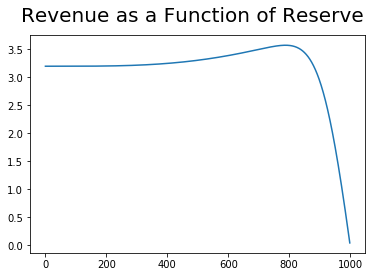

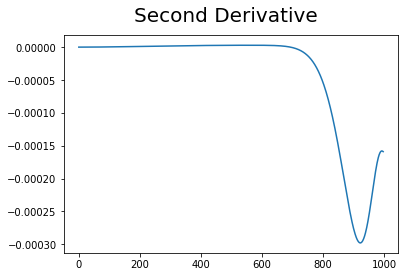

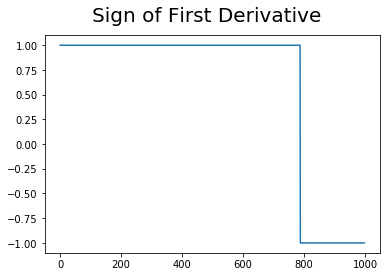

In [16]:
import numpy as np
import time

max_time_allowed = 30

# Use binary search-esque method to find optimal reserve
# We assume the revenue is a convex function w.r.t. the reserve
# We approximate revenue for a given (a, k, n, r) configuration with a DP
# solution
#
# This can also be done empirically using our simulations, with some
# robustification
def calc_reserve_binary(a, k, n, num_iter):
    low_r = 0
    high_r = 1
    eps = 1e-10
    start = time.time()

    for i in range(num_iter):
        curr_loop_start = time.time()
        if i > 0 and (max_time_allowed - 1) \
                < (curr_loop_start - start) * (i + 1) / i:
            print("taking too long")
            break
        if num_iter == 8:
            eps = 1e-15

        curr_r = (low_r + high_r) / 2.0
        curr_revenue = compute_expected_dp_uniform(a, k, curr_r, n)
        curr_r_eps = curr_r + eps
        curr_revenue_eps = compute_expected_dp_uniform(a, k, curr_r_eps, n)

        # check to see which side of peak we're on
        if curr_revenue_eps >= curr_revenue:
            low_r = curr_r
        else:
            high_r = curr_r

    r_opt = (low_r + high_r) / 2.0
    return r_opt

def compute_expected_dp_uniform(a, k, r, n):
    dp_array = np.zeros((k, a)) 
    p_lose = r ** n
    p_win = 1 - r ** n
    e_win = 1.0 * n / (n + 1) * (1 - r ** (n + 1)) / (1 - r ** n)
    for i in range(0, k):
        dp_array[i, 0] = p_win * e_win

    for j in range(1, a):
        dp_array[0, j] = p_lose * dp_array[0, j - 1] + p_win * e_win

    for i in range(1, k):
        for j in range(1, a):
            dp_array[i][j] = p_lose * dp_array[i][j - 1] \
                + p_win * (dp_array[i - 1][j - 1] + e_win)
    return dp_array[k - 1, a - 1]

def simulate_fpa_seller_reserve(
        num_players, distribution, reserve, num_items, num_auctions=1000):
    seller_earnings = 0.0
    for i in range(num_auctions):
        if num_items == 0:
            break
        valuations = np.zeros(num_players)
        if distribution == "uniform":
            valuations = np.random.uniform(size=num_players)
        elif distribution == "exponential":
            valuations = np.random.exponential(0.5, size=num_players)
        else:
            print("Unknown distribution!")
            return
        bids = np.copy(valuations)
        if np.max(bids) > reserve and num_items > 0:
            seller_earnings += np.max(bids)
            num_items -= 1
    return seller_earnings

# empirically computed expected profit selling i + 1 items at j + 1 auctions
# for (a, k, r, n)
def compute_expected_empirical_uniform(a, k, r, n):
    summation = 0
    num_trials = 10000
    for i in range(num_trials):
        summation += simulate_fpa_seller_reserve(n, "uniform", r, k, a)
    return 1.0 * summation / num_trials


def calculate_reserve(a, k, n):
    if a == k:
        return 0
    # run a maximum of 30 iterations
    return calc_reserve_binary(a, k, n, 30)

# to show the derivative of revenue as a function of reserve only changes sign
# once (our optimization method works)
import matplotlib.pyplot as plt

a = 10
k = 4
n = 4

r_jump = .001
r_vals = np.arange(0, 1, r_jump)
revenue = np.zeros((int(1.0 / r_jump)))
for r in r_vals:
    revenue[int(r / r_jump)] = compute_expected_dp_uniform(a, k, r, n)
    
fig = plt.figure()
plt.plot(revenue)
fig.suptitle("Revenue as a Function of Reserve", fontsize=20)
# looks like a nice function to optimize!

fig = plt.figure()
plt.plot(np.diff(revenue, n=2))
fig.suptitle("Second Derivative", fontsize=20)
# not convex, but...

fig = plt.figure()
# sign of first derivative
plt.plot(np.sign(np.diff(revenue, n=1)))
fig.suptitle("Sign of First Derivative", fontsize=20)
# the derivative is positive up until the max, and negative after
# this means we can perform a binary-esque search to find

## References
[1] Sahai, A., Mishra, M., Tandra, R., Woyach, K., 2009. Cognitive radios for spectrum sharing. IEEE Signal
Processing Magazine , 140–146. <br />
[2]  A. Sahai, K. Woyach, K. Harrison, H. Palaiyanur, and R. Tandra, “Towards a “theory of spectrum zoning”,” Allerton, Oct. 2009. <br />
[3] Nozick, Robert. Anarchy, State, and Utopia. New York: Basic, 1974. Print. <br />
[4] Rawls, J. A. (1971) A Theory of Justice. Cambridge, MA: Harvard University Press. <br />


## Definitions
For this model to work, we should start with a list of assumptions:
<ul>
<li> Infinite wealth: Each buyer can afford to pay their valuation of the item;</li>
<li> Anonymity: The only thing that matters is the buyer's bid, not the identity of the buyer (more formally, if buyer $i$ offers $x_i$ and wins against buyer $j$ who offers $x_j$, then buyer $j$ would win if she would offer $x_i + \epsilon$);</li>
<li> Privacy: Buyer $i$ only knows the value $x_i$ and does not know any bids or valuations $\beta_j \text{ or } x_j \ \forall j\neq i$;</li>
<li> All auctions are sealed-bid auctions: Every buyer submits the bid simultaneously.</li>
</ul>
[Back to Assumptions](#Assumptions)